In [54]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Load result

In [55]:
def load_loss(path): 
    files = glob.glob(path)
    dfs_split = []
    for file in files: 
        df = pd.read_csv(file, index_col=[0,1], header=[0,1])
        dfs_split.append(df)
    
    return dfs_split

In [58]:
path = '../result/gefcom2014-solar/trial21/dfs_loss_valid_model/*.csv'
dfs_loss_split_valid = load_loss(path)

## Competition benchmark

In [59]:
loss_mean_valid = [df.mean().mean() for df in dfs_loss_split_valid]

In [60]:
df_scores = pd.read_excel('../data/gefcom2014/gefcom2014-scores.xlsx', index_col=0, header=0, sheet_name='Solar')
df_scores.loc['Solar trial',:] = loss_mean_valid
df_scores.loc[:,'Overall'] = df_scores.mean(axis=1)

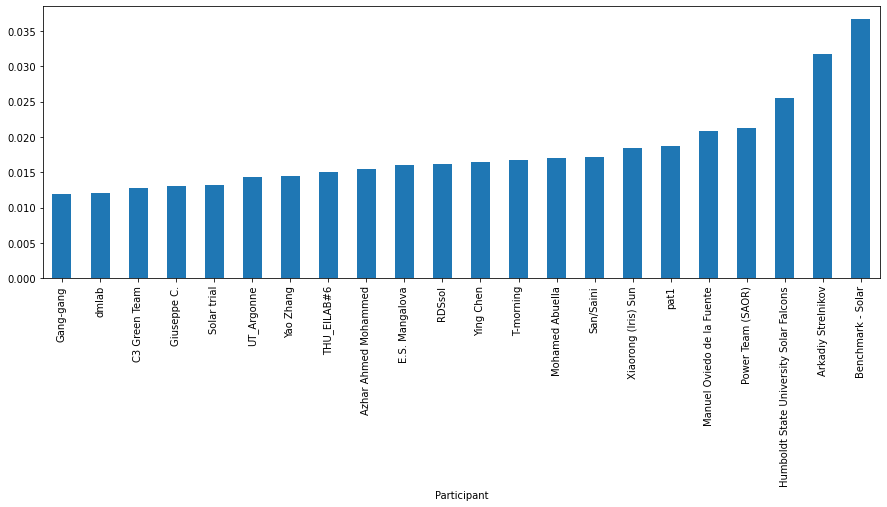

In [61]:
ax = df_scores['Overall'].sort_values().plot.bar(figsize=(15,5))

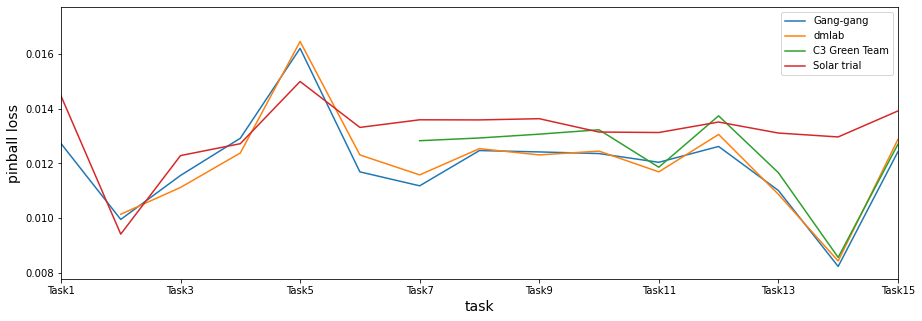

In [62]:
fig, ax = plt.subplots(figsize=(15,5))
df_scores.loc['Gang-gang',:][:-1].plot(ax=ax)
df_scores.loc['dmlab',:][:-1].plot(ax=ax)
df_scores.loc['C3 Green Team',:][:-1].plot(ax=ax)
df_scores.loc['Solar trial',:][:-1].plot(ax=ax)
ax.set_xlabel('task', fontsize=14)
ax.set_ylabel('pinball loss', fontsize=14)
ax.legend()

## Pinball loss as function of quantiles

In [45]:
def plot_pinball_quantile(loss_split):
    loss_split_means = []
    for loss_farm in loss_split:
        loss_split_mean = [np.mean(loss, axis=0) for loss in loss_farm]
        loss_split_means.append(loss_split_mean) 

    fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(20,20), sharey=True)
    ax = ax.flatten()
    for i, loss_split_farm in enumerate(loss_split_means):
        ax[i].set_title('task: {0}'.format(i+1))
        for loss_split_quantile in loss_split_farm:
            ax[i].plot(range(1,100), loss_split_quantile)

In [46]:
plot_pinball_quantile(loss_splits[-1])

NameError: name 'loss_splits' is not defined

In [ ]:
plot_pinball_quantile(loss_splits[-1])

In [ ]:
plot_pinball_quantile(loss_splits[4])